# IML Assignment 1


## Name: Liana Mardanova

## Mail: l.mardanova@innopolis.university

## Group: DS-01


## Task 1


### 3.1. Linear Regression

#### Data reading


In [869]:
import pandas as pd

# Read the dataset from file, convert it to pandas DataFrame
# We observe that the first column is the index column, so we can use it as the index
df = pd.read_csv("./train_1.csv", index_col=0)

#### Train\validation splitting


In [870]:
from sklearn.model_selection import train_test_split

# Divide data into features (X) and labels (y)
# X contains all rows and all columns except the last column
X = df.iloc[:, :-1]

# y contains all rows and only the last column
y = df.iloc[:, -1]

# Split the data into training (80%) and testing (20%) DataFrames
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2143
)

#### Linear regression model fitting


In [871]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()  # Create linear regression model
linear_model.fit(X_train, y_train)  # Train model on the training data

# Predict target values for the test data using the trained model
y_pred_lr = linear_model.predict(X_test)

#### Linear regression model prediction & Evaluation


In [872]:
from sklearn import metrics
import numpy


# Print MSE, RMSE, MAE and R2 score
def print_metrics(y_actual, y_pred):
    # Use basic functions for metrics from sklearn library
    print("Mean Squared Error (MSE):", metrics.mean_squared_error(y_actual, y_pred))
    print(
        "Root Mean Squared Error (RMSE):",
        numpy.sqrt(metrics.mean_squared_error(y_test, y_pred)),
    )
    print("Mean Absolute Error (MAE):", metrics.mean_absolute_error(y_actual, y_pred))
    print("R-squared (R2) score:", metrics.r2_score(y_actual, y_pred))


print_metrics(y_test, y_pred_lr)

Mean Squared Error (MSE): 4478.577612868854
Root Mean Squared Error (RMSE): 66.92217579299745
Mean Absolute Error (MAE): 54.02689904135268
R-squared (R2) score: 0.8408639408382879


### 3. 2 Polynomial Regression

#### Constructing the polynomial regression pipeline


In [873]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [874]:
# Create a pipeline for polynomial regression
# Steps in pipeline:
# - "PolynomialFeatures" do tranformation of given features to polynomial features
# - "LinearRegression" do linear regression with transformed features
pipeline = Pipeline(
    [
        ("polynomial_features", PolynomialFeatures(degree=2)),
        ("linear_regression", LinearRegression()),
    ]
)

#### Tuning the degree hyper-parameter using GridSearch


In [875]:
from sklearn.model_selection import GridSearchCV

# Declare the parameter specifying the range of polynomial degrees to explore
param_grid = {"polynomial_features__degree": range(2, 6)}

# Declare a GridSearchCV instance:
# - Uses the polynomial regression pipeline
# - Searches over the specified parameter grid
# - Uses 8-fold cross-validation
# - Score based on negative mean squared error
search = GridSearchCV(pipeline, param_grid, cv=8, scoring="neg_mean_squared_error")
# Train GridSearch instance on the training data
search.fit(X_train, y_train)

# Optimum degree found by the GridSearch instance
print(f"Best parameter: {search.best_params_['polynomial_features__degree']}")
# Best score obtained by the GridSearch instance (negative mean squared error)
print(f"Search score: {search.best_score_}")

Best parameter: 4
Search score: -0.4331952694095369


In [876]:
# Predict target values using the trained model and print metrics
y_pred_polynomial = search.predict(X_test)
print_metrics(y_test, y_pred_polynomial)

Mean Squared Error (MSE): 0.19646759997820112
Root Mean Squared Error (RMSE): 0.4432466581692423
Mean Absolute Error (MAE): 0.3378999357657701
R-squared (R2) score: 0.9999930189711297


#### Save the model


In [877]:
import pickle

# Save the GridSearch model for evaluation
filename = "poly_optimized_model.sav"
pickle.dump(search, open(filename, "wb"))

### 3.3 Determine the linear dependent features

Use the following code cell to determine a pair of features from the training dataset that are correlated to each other. Explain your choise in the markdown cell.


Features with highest correlation: X_2 and X_3
Correlation coefficient of these features: -0.9907395344829824


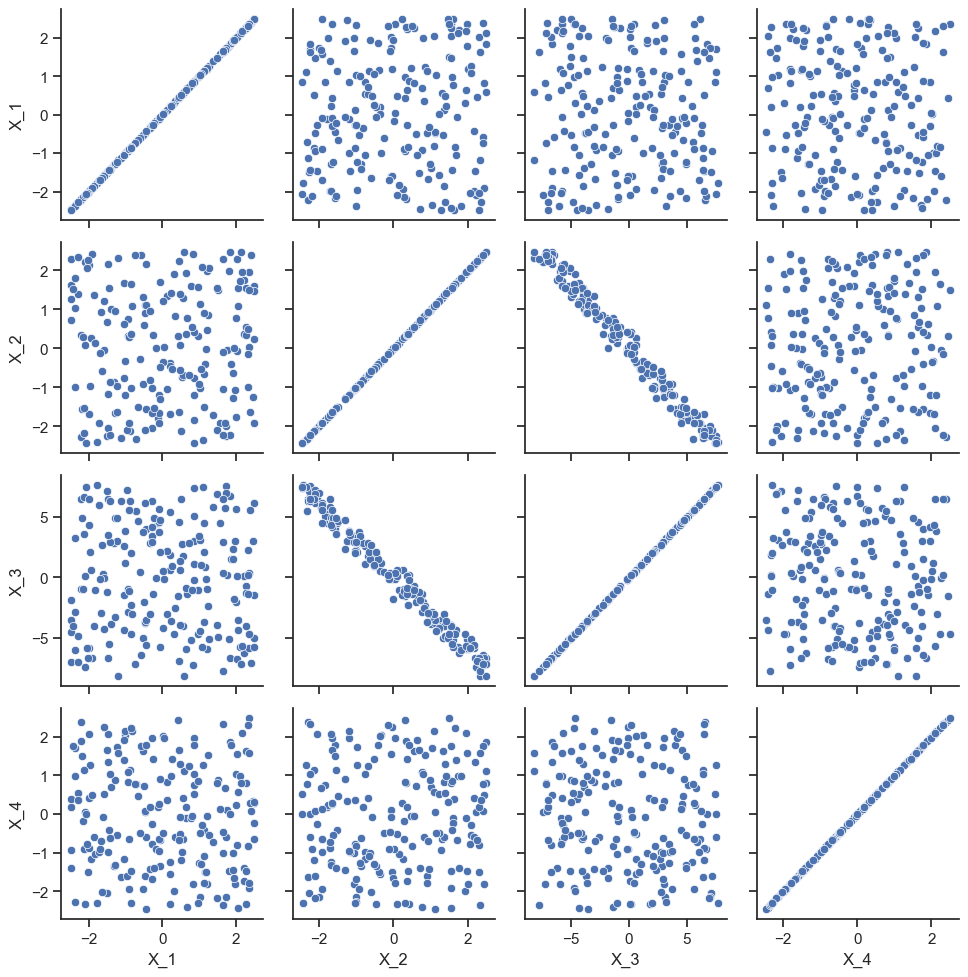

In [878]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for the DataFrame 'df'
correlation_matrix = df.corr()
# Declare list to store correlation coefficients and corresponding feature pairs
correlation_coefficient_and_pairs = []

# Iterate through the columns of the correlation matrix
for i in range(len(correlation_matrix.columns) - 1):
    # Iterate through the columns which index is higher to avoid duplicates
    for j in range(i + 1, len(correlation_matrix.columns) - 1):
        # Append a list with correlation coefficient, and the corresponding feature pairs
        correlation_coefficient_and_pairs.append(
            [
                correlation_matrix.iloc[i, j],
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
            ]
        )

# Sort the list in descending order based on the absolute correlation coefficient
correlation_coefficient_and_pairs.sort(reverse=True, key=lambda x: abs(x[0]))

print(
    f"Features with highest correlation: {correlation_coefficient_and_pairs[0][1]} and {correlation_coefficient_and_pairs[0][2]}"
)
print(
    f"Correlation coefficient of these features: {correlation_coefficient_and_pairs[0][0]}"
)

# Create and display a PairGrid for features
pair_grid = sns.PairGrid(X)
pair_grid.map(sns.scatterplot)
plt.show()

**Explanation of choosing features**

A linearly dependent pair of features is **X_2** and **X_3**. The `corr()` function from the Pandas library was utilized to generate the correlation matrix, which was then examined to arrive at this conclusion. The features that exhibit the **strongest linear association** are **X_2** and **X_3**, with a correlation coefficient of roughly **_-0.9907_**. The coefficient, which is close to -1, suggests a **strong negative linear correlation** between **X_2** and **X_3**.

The chosen features are used in _PairGrid_ to graphically depict this correlation. Additionally, the intuitive comprehension of the linear relationship between **X_2** and **X_3** is aided by this picture.


## Task 2


### 4.1 Data processing

#### Loading the dataset


In [879]:
import pandas as pd

#### Exploring the dataset and removing 2 redundant features


In [880]:
# Read the dataset from file, convert it to pandas DataFrame
df = pd.read_csv("./pokemon_modified.csv")

df.info()
for i in df.columns:
    print(df[i].value_counts())
    print()

# We observe that all values in the "name" column are different.
# Thus this feature can be removed, since it does not provide useful information for determining if a pokemon is legendary.
# Additionally, we can remove the "classification" column due to its large number (588) of unique text values,
# which would result in high computational complexity for model after encoding.
df = df.drop(["name", "classification"], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   against_bug        801 non-null    float64
 1   against_dark       801 non-null    float64
 2   against_dragon     801 non-null    float64
 3   against_electric   801 non-null    float64
 4   against_fairy      801 non-null    float64
 5   against_fight      801 non-null    float64
 6   against_fire       801 non-null    float64
 7   against_flying     801 non-null    float64
 8   against_ghost      801 non-null    float64
 9   against_grass      801 non-null    float64
 10  against_ground     801 non-null    float64
 11  against_ice        801 non-null    float64
 12  against_normal     801 non-null    float64
 13  against_poison     801 non-null    float64
 14  against_psychic    801 non-null    float64
 15  against_rock       801 non-null    float64
 16  against_steel      801 non

#### Splitting the data

Use random_state = 123, stratify, and set test_size = 0.2


In [881]:
from sklearn.model_selection import train_test_split

# Divide data into features (X) and labels (y)
# X contains all rows and all columns except the last column
X = df.iloc[:, :-1]

# y contains all rows and only the last column
y = df.iloc[:, -1]

# Split the data into training (80%) and testing (20%) DataFrames
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123, stratify=y
)

Check if the dataset is balanced or not and comment on it


In [882]:
# Distribution of labels
print(y.value_counts())

# Iterate through unique labels in the training set
for label in y.unique():
    # Percentage of rows with unique label in the training and test sets
    print(
        f"Label = {label} in the training set represents {sum(y_train == label) / len(X_train) * 100:.2f}% of rows"
    )
    print(
        f"Label = {label} in the test set represents {sum(y_test == label) / len(X_test) * 100:.2f}% of rows"
    )
    print()

# Dataset is not balanced. Usage of "stratify" during data splitting helps us maintain the same distribution of labels
# in both the training and test sets.

is_legendary
0    731
1     70
Name: count, dtype: int64
Label = 0 in the training set represents 91.25% of rows
Label = 0 in the test set represents 91.30% of rows

Label = 1 in the training set represents 8.75% of rows
Label = 1 in the test set represents 8.70% of rows



#### Checking for missing values


In [883]:
from pandas import DataFrame


def check_missing_columns(
    data_X: DataFrame, data_X_train: DataFrame, data_X_test: DataFrame
) -> None:
    """
    Check and print column's names with missing values in given data

    Args:
        data_X (DataFrame): The data containing all features.
        data_X_train (DataFrame): The training subset of the data.
        data_X_test (DataFrame): The testing subset of the data.

    Returns:
        None
    """
    columns_with_missing_values = []
    # Iterate through columns
    for column in data_X.columns:
        # Check if there are missing values in the corresponding columns of training or test sets
        if (
            data_X_test[column].isnull().sum() > 0
            or data_X_train[column].isnull().sum() > 0
        ):
            columns_with_missing_values.append(column)

    if not columns_with_missing_values:
        print("No missing values found in any column.")
    else:
        print(
            "Found missing values in the following columns:",
            columns_with_missing_values,
        )


check_missing_columns(X, X_train, X_test)

Found missing values in the following columns: ['height_m', 'percentage_male', 'weight_kg']


#### Impute the missing values


In [884]:
from sklearn.impute import SimpleImputer

# Define a SimpleImputer instance
imputer = SimpleImputer(strategy="most_frequent")
imputer.fit(X_train)

# Apply the imputer to the train and test data
X_train = pd.DataFrame(imputer.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

#### Double check that there are no missing values


In [885]:
check_missing_columns(X, X_train, X_test)

No missing values found in any column.


#### Encode categorically


In [886]:
from sklearn.preprocessing import OneHotEncoder


def encode_ohe(data: DataFrame, column_name: str, encoder: OneHotEncoder):
    """
    Encode a column using OneHotEncoder, concatenate it to the DataFrame and remove given column

    Args:
        data (DataFrame): The DataFrame containing the original data.
        column_name (str): The name of the categorical column to be encoded.
        encoder (OneHotEncoder): The OneHotEncoder instance to perform encoding.

    Returns:
        DataFrame: The DataFrame with the specified column encoded and replaced.
    """

    # Encode given column in data
    encoded_data = pd.DataFrame(
        encoder.transform(data[[column_name]]),
        columns=encoder.get_feature_names_out([column_name]),
    )

    # Concatenate the encoded data with the original DataFrame
    data = pd.concat([data, encoded_data], axis=1)

    # Drop the given column
    data.drop([column_name], axis=1, inplace=True)

    return data


# Create an instance of OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
column_to_encode = "type1"

# Fit the encoder and encode the specified column in the training and test sets
encoder.fit(pd.DataFrame(X_train[column_to_encode]))
X_train = encode_ohe(X_train, column_to_encode, encoder)
X_test = encode_ohe(X_test, column_to_encode, encoder)

#### Scale the data


In [887]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# Declare scaler instance
scaler = StandardScaler()

# Apply the scaler on train and test data
scaler.fit(X_train)
x_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
x_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

#### <span style="color:red">Correlation matrix</span>


Are there highly co-related features in the dataset? Is it a problem? Explain in the markdown cell.


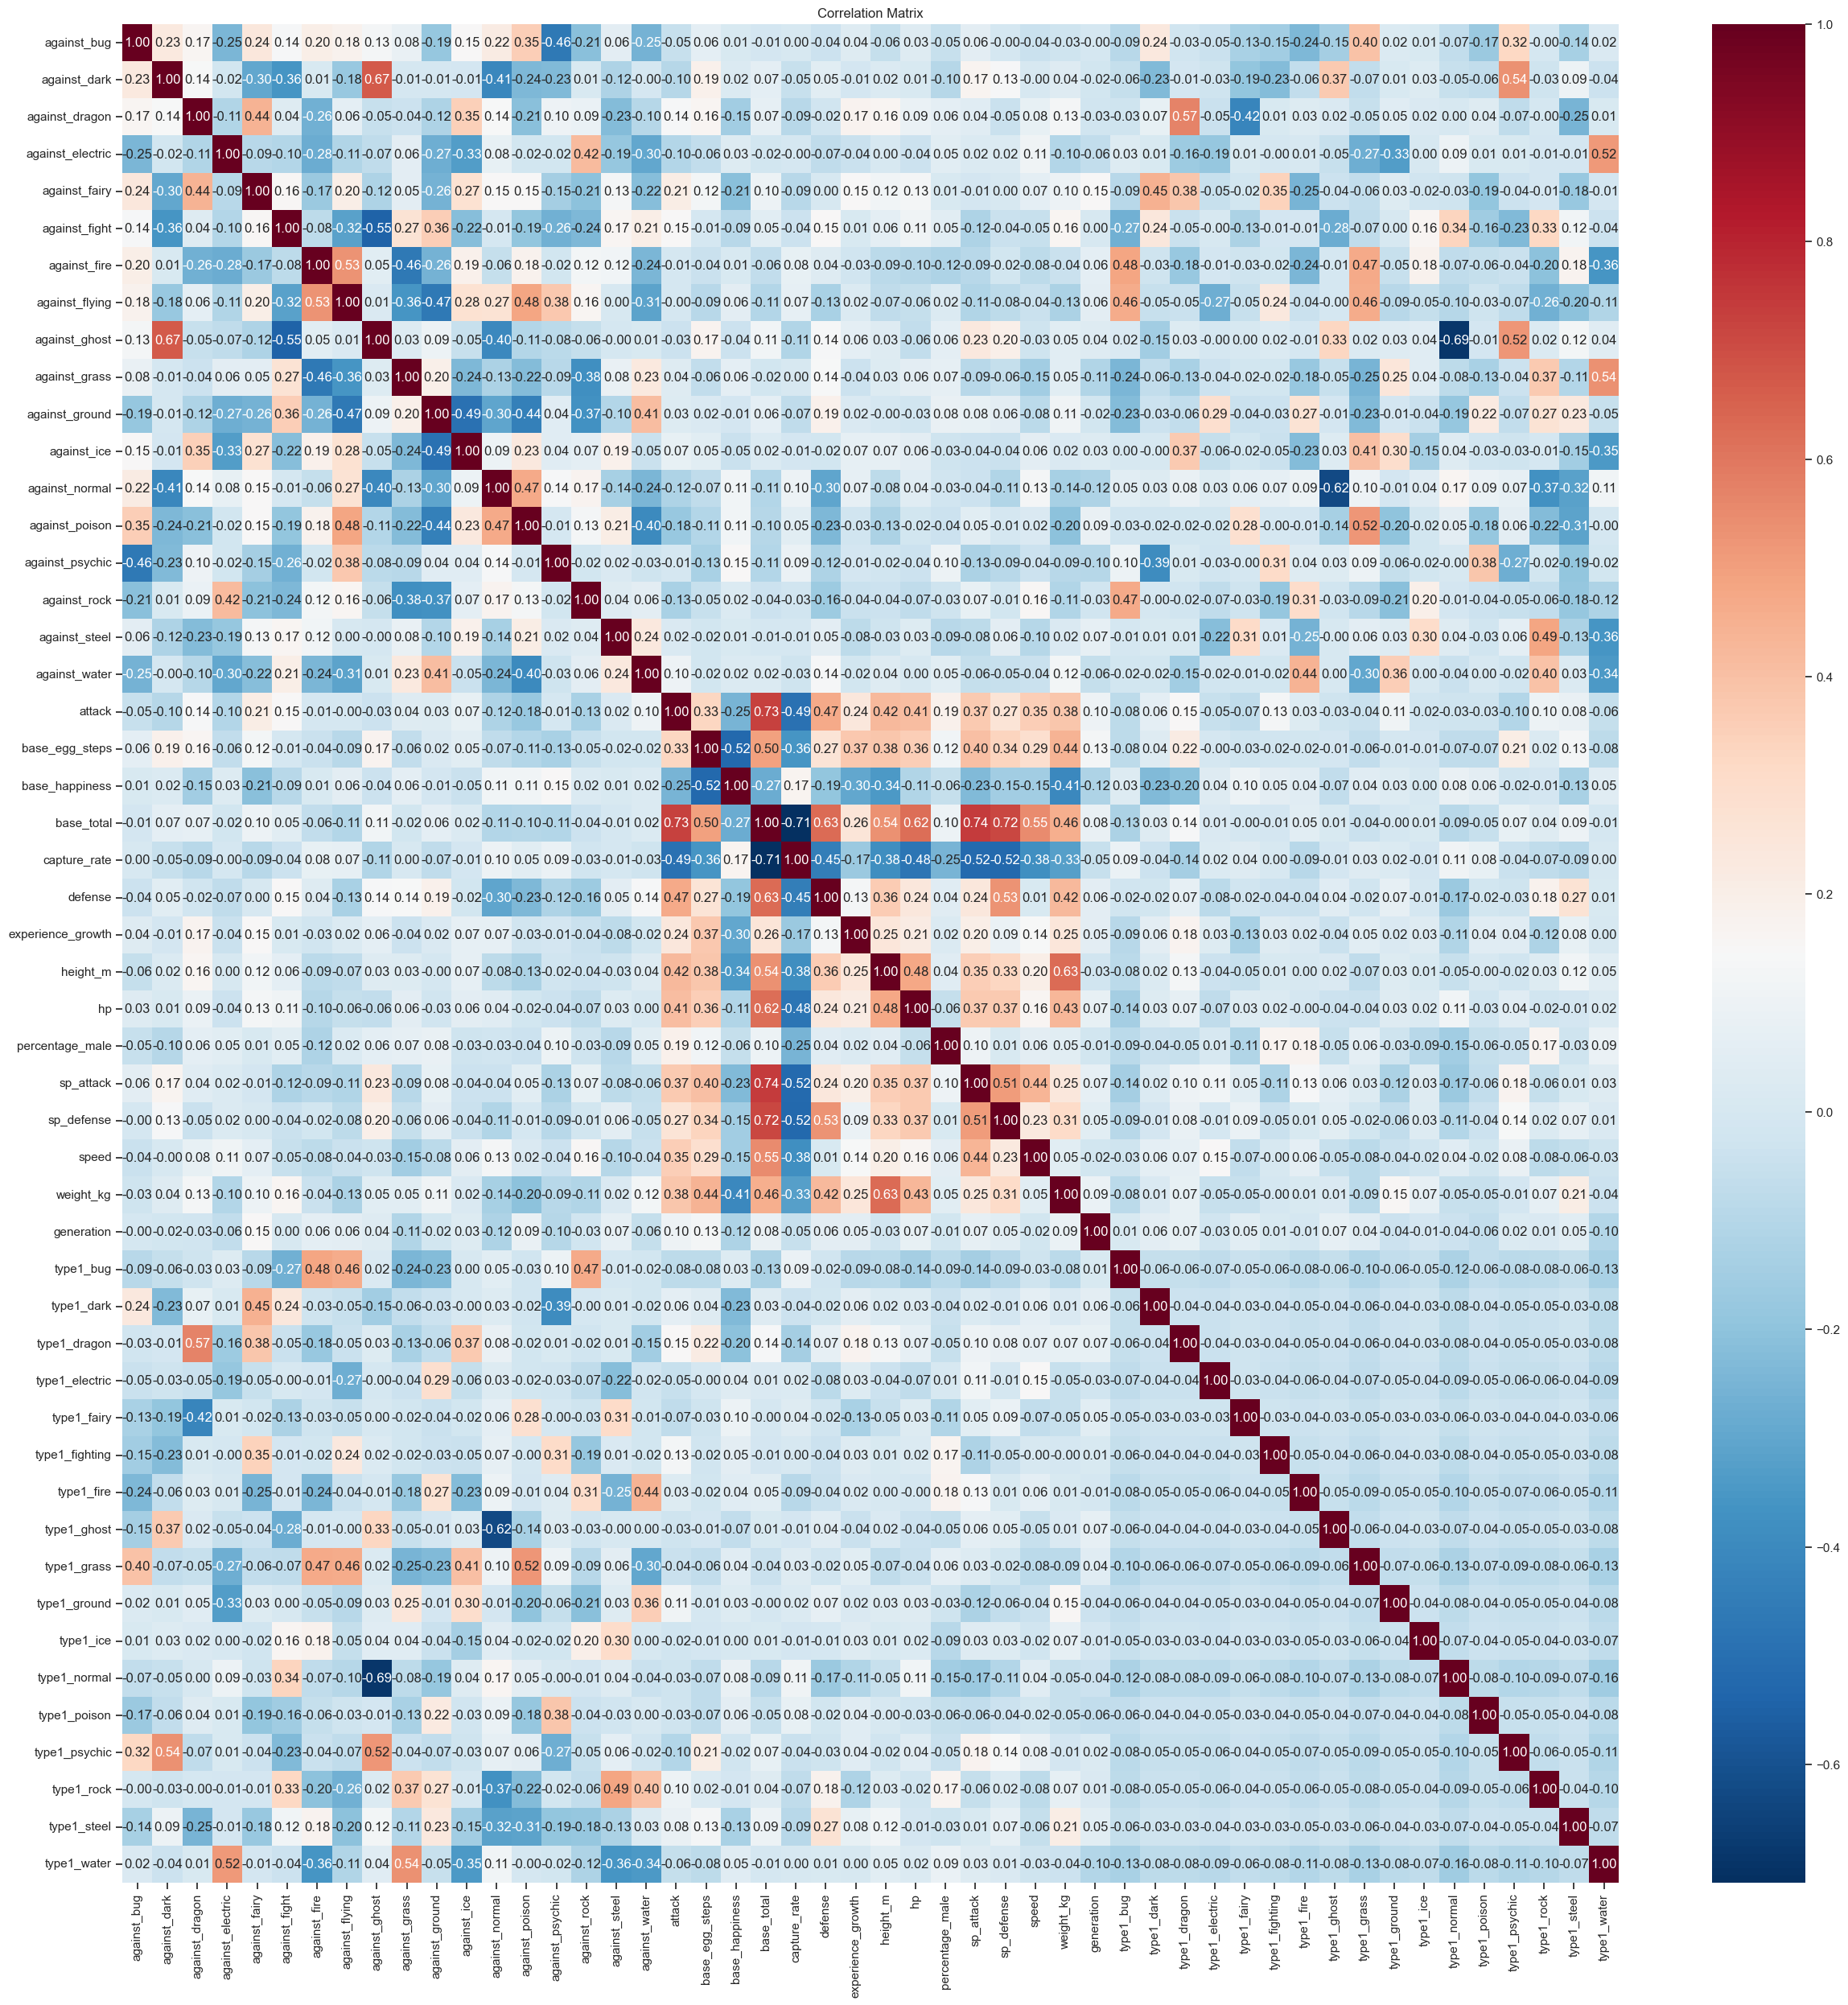

In [888]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 30))

# Plot the correlation matrix
X = encode_ohe(X, "type1", encoder)
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
corr_matrix = X.corr()

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="RdBu_r")
plt.title("Correlation Matrix")
plt.show()

Four feature pairings in the provided dataset have correlation coefficients greater than 0.7 (which is relatively high correlation coefficient). Increased correlation between these characteristics raises the possibility of issues with multicollinearity, redundancy, and poor interpretability in ML models.

It is crucial to remember that although while a correlation value of 0.7 is slightly elevated, it may not always indicate a serious problem. Moderately correlated features can occasionally provide the model with useful information without posing a serious risk. Furthermore, features with strong correlation may capture different characteristics of the underlying data, improving the prediction performance of the model in certain situations.

As a result, at present, retaining all these features is acceptable. Further exploration and evaluation of the model's performance on a larger dataset can help to understand if additional actions, such as feature selection or dimensionality reduction, are needed.


### 4.2 Model fitting and Comparison


#### Tuning LR model


In [889]:
# Caclulate and print classification metrics: accuracy, precision, recall, and F1 score
def print_clf_metrics(y_actual, y_pred):
    # Use basic functions for metrics from sklearn library
    print(f"Accuracy: {metrics.accuracy_score(y_actual, y_pred)}")
    print(f"Precision: {metrics.precision_score(y_actual, y_pred)}")
    print(f"Recall: { metrics.recall_score(y_actual, y_pred)}")
    print(f"F1 Score: {metrics.f1_score(y_actual, y_pred)}")

In [890]:
# Specify GridSearchCV as in intruction
parameters = parameters = {
    "penalty": ["l1", "l2"],
    "C": np.logspace(-3, 3, 7),
    "solver": ["newton-cg", "lbfgs", "liblinear"],
}

In [891]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# Declare and train logistic regression model inside GridSearchCV with the parameters above
lr_clf_gs = GridSearchCV(
    LogisticRegression(max_iter=1000), parameters, scoring="f1", cv=6
)
lr_clf_gs.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_linesearch

GridSearchCV(cv=6, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='f1')

In [892]:
# Print best parameters for logistic regression model and accuracy for model with theese parameters
print("Tuned Hyperparameters:", lr_clf_gs.best_params_)
print("Accuracy:", lr_clf_gs.best_score_)

Tuned Hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.9136925237931429


#### Construct a LR with the best params and Evaluate the LR with the best params


In [893]:
# Declare, train and evaluate performance of logistic regression model with best parameters found earlier
lr_clf = LogisticRegression(**lr_clf_gs.best_params_)
lr_clf.fit(X_train, y_train)
lr_y_pred = lr_clf.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [894]:
print_clf_metrics(y_test, lr_y_pred)

Accuracy: 0.9875776397515528
Precision: 0.9285714285714286
Recall: 0.9285714285714286
F1 Score: 0.9285714285714286


#### Print the top 5 most influencing features and the top 5 ignored features


In [895]:
# Extracting coefficients from the trained logistic regression model and sorting in ascending order
coefficients = lr_clf.coef_[0]
sorted_coeff = np.argsort(lr_clf.coef_[0])

# Printing the top 5 ignored/influencing feature names along with their coefficients
print("Top 5 Ignored Features:")
for i, j in enumerate(sorted_coeff[:5]):
    print(f"{i+1}. {X_train.columns[j]}: {coefficients[j]}")
print()
print("Top 5 Influencing Features:")
for i, j in enumerate(reversed(sorted_coeff[-5:])):
    print(f"{i+1}. {X_train.columns[j]}: {coefficients[j]}")

Top 5 Ignored Features:
1. capture_rate: -0.06923337252736915
2. percentage_male: -0.020405070509244377
3. hp: -0.015647311405326905
4. base_happiness: -0.013839521973174342
5. defense: -0.004434104410506724

Top 5 Influencing Features:
1. sp_attack: 0.012634116386857944
2. speed: 0.008225419281191741
3. sp_defense: 0.0016768496542598527
4. base_total: 0.001600933528288134
5. weight_kg: 0.0011305564123373268


#### Tuning KNN model


In [896]:
from sklearn.neighbors import KNeighborsClassifier

# Declare and train KNN model inside GridSearchCV
param_grid = {
    "n_neighbors": list(range(1, 15)),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "chebyshev", "cosine"],
}
knn_clf_gs = GridSearchCV(KNeighborsClassifier(), param_grid, scoring="accuracy")
knn_clf_gs.fit(X_train, y_train)

# Print best parameters for KNN model and accuracy for model with theese parameters
print("Tuned Hyperparameters:", knn_clf_gs.best_params_)
print("Accuracy:", knn_clf_gs.best_score_)

Tuned Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}
Accuracy: 0.990625


#### Construct a KNN model with the best params and Evaluate the KNN with the best params


In [897]:
# Declare, train and evaluate performance of KNN model with best parameters found earlier
knn_clf = KNeighborsClassifier(**knn_clf_gs.best_params_)
knn_clf.fit(X_train, y_train)
knn_y_pred = knn_clf.predict(X_test)
print_clf_metrics(y_test, knn_y_pred)

Accuracy: 0.9937888198757764
Precision: 0.9333333333333333
Recall: 1.0
F1 Score: 0.9655172413793104


#### Fitting GNB to the data and evaluating on the test dataset


In [898]:
from sklearn.naive_bayes import GaussianNB

# Declare, train and evaluate performance of GaussianNB. No hyperparameters tuning
gauss_nb_clf = GaussianNB()
gauss_nb_clf.fit(X_train, y_train)
gauss_y_pred = gauss_nb_clf.predict(X_test)
print_clf_metrics(y_test, gauss_y_pred)

Accuracy: 0.9627329192546584
Precision: 0.7
Recall: 1.0
F1 Score: 0.8235294117647058


#### Which metric is most appropriate for this task and why?


To determine if a pokemon is legendary or not, the F1-score is the most suitable metric as it offers a fair assessment that takes into account both recall and precision, which are important metrics.

Recall is more crucial metric in comparison with precision because it tells more about recognizing legendary pokemon that is important most. Under this situation, a false negative - designating a legendary Pokemon as non-legendary - might be more harmful since it would prevent the identification of a rare and important pokemon.


#### Compare the 3 classifiers in terms of accuracy, precision, recall and F1-score.

What is the best model for this task? Explain


In [899]:
print("Logistic Regression Metrics:")
print_clf_metrics(y_test, lr_y_pred)

print("\nK-Nearest Neighbors Metrics:")
print_clf_metrics(y_test, knn_y_pred)

print("\nGaussian Naive Bayes Metrics:")
print_clf_metrics(y_test, gauss_y_pred)

Logistic Regression Metrics:
Accuracy: 0.9875776397515528
Precision: 0.9285714285714286
Recall: 0.9285714285714286
F1 Score: 0.9285714285714286

K-Nearest Neighbors Metrics:
Accuracy: 0.9937888198757764
Precision: 0.9333333333333333
Recall: 1.0
F1 Score: 0.9655172413793104

Gaussian Naive Bayes Metrics:
Accuracy: 0.9627329192546584
Precision: 0.7
Recall: 1.0
F1 Score: 0.8235294117647058


Let's examine the classifiers based on the above metrics for Gaussian Naive Bayes (GNB), K-Nearest Neighbors (KNN), and Logistic Regression:

1. **Accuracy**:

   - Logistic Regression: 0.9751
   - K-Nearest Neighbors: 0.9938
   - Gaussian Naive Bayes: 0.9627

   K-Nearest Neighbors has the highest accuracy followed closely by Logistic Regression, with Gaussian Naive Bayes trailing slightly behind.

2. **Precision**:

   - Logistic Regression: 0.9286
   - K-Nearest Neighbors: 0.9333
   - Gaussian Naive Bayes: 0.7000

   Both Logistic Regression and K-Nearest Neighbors have similar precision scores, while Gaussian Naive Bayes has a notably lower precision.

3. **Recall**:

   - Logistic Regression: 0.9286
   - K-Nearest Neighbors: 1.0000
   - Gaussian Naive Bayes: 1.0000

   K-Nearest Neighbors and Gaussian Naive Bayes have perfect recall, while Logistic Regression has slightly lower but still high recall.

4. **F1 Score**:

   - Logistic Regression: 0.9286
   - K-Nearest Neighbors: 0.9655
   - Gaussian Naive Bayes: 0.8235

   K-Nearest Neighbors achieves the highest F1-score, indicating a good balance between precision and recall. Logistic Regression follows closely, while Gaussian Naive Bayes has a lower F1-score.

Taking into account all measures, K-Nearest Neighbors (KNN) performs well in the assigned classification job, displaying excellent levels of recall, accuracy, precision, and F1-score. However, this model has several drawbacks. KNN requires the computation of distances for each prediction, it may be computationally costly, particularly as the dataset grows. The model’s robustness can be affected by a number of issues, including sensitivity to outliers, the curse of dimensionality, the need for an ideal 'k' value, and difficulties with unbalanced datasets. Although KNN works well in this context, thorough consideration of these disadvantages is necessary for a comprehensive assessment and possible investigation of other models, for for example LogisticRegression. Since it also performs well on this task.


## 5. Bonus Task


#### Loading the Dataset


In [900]:
import pandas as pd

# Read the train and test datasets from file, convert it to pandas DataFrame
train_data = pd.read_csv("bonus_train.csv")
test_data = pd.read_csv("bonus_test.csv")

In [901]:
# Split the data into features and labels for test and training
X_train, X_test, y_train, y_test = (
    train_data.iloc[:, :-1],
    test_data.iloc[:, :-1],
    train_data.iloc[:, -1],
    test_data.iloc[:, -1],
)

#### Plot the data using the pairplot in sns


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


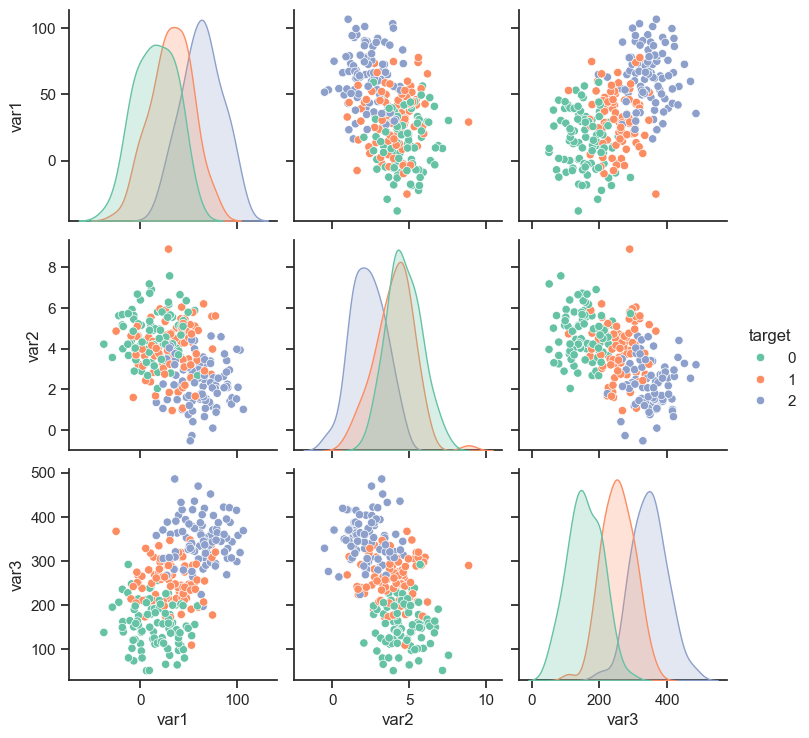

In [902]:
import seaborn as sns
import matplotlib.pyplot as plt

# Print obtained data
sns.pairplot(train_data, kind="scatter", hue="target", palette="Set2")
plt.show()

#### Fit LR to the training dataset using OVR and evaluate on the test dataset


In [903]:
# Declare, train and evaluate performance of Logistic Regression model (one-vs-rest)
ovr_lr = LogisticRegression(multi_class="ovr", max_iter=1000)
ovr_lr.fit(X_train, y_train)
print("Accuracy ovr:", ovr_lr.score(X_test, y_test))

Accuracy ovr: 0.8


#### Fit LR to the training dataset using multinomial and evaluate on the test dataset


In [904]:
# Declare, train and evaluate performance of Logistic Regression model (multinomial)
multi_lr = LogisticRegression(multi_class="multinomial", max_iter=1000)
multi_lr.fit(X_train, y_train)
print("Accuracy multinomial:", multi_lr.score(X_test, y_test))

Accuracy multinomial: 0.9


#### Using gridsearch to tune the C value and multi class


In [905]:
# Declare the parameters to explore
params = {"C": np.logspace(-10, 10, 7), "multi_class": ["multinomial", "ovr"]}
# Declare a GridSearchCV instance
grid_search_clf = GridSearchCV(LogisticRegression(max_iter=1000), params, cv=8)
# Train GridSearch instance on the training data
grid_search_clf.fit(X_train, y_train)

GridSearchCV(cv=8, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.00000000e-10, 2.15443469e-07, 4.64158883e-04, 1.00000000e+00,
       2.15443469e+03, 4.64158883e+06, 1.00000000e+10]),
                         'multi_class': ['multinomial', 'ovr']})

In [906]:
# Print best parameters for logistic regression model and accuracy for model with theese parameters
print("Tuned Hyperparameters:", grid_search_clf.best_params_)
print("Accuracy:", grid_search_clf.best_score_)

Tuned Hyperparameters: {'C': 0.0004641588833612782, 'multi_class': 'multinomial'}
Accuracy: 0.82174688057041


#### Comment on why one multi_class technique was better than the other


The type of problem determines which logistic regression method—multinomial or one-vs-rest (OVR)—is best. The greater accuracy in this instance suggests that the multinomial approach performed better than OVR.
Multinomial is appropriate in situations where there is no class independence and potential intersection of decision boundaries between classes. It directly simulates the combined probability distribution of every class. However, if the classes are not mutually exclusive, OVR interprets each class as a separate binary problem, which may not be appropriate.

Consequently, the multinomial technique's greater performance indicates that addressing the classes in the current task simultaneously, as opposed to treating them as separate entities, is a better way to capture their relationships.


#### Create LR with the best params


In [907]:
# Create Logistic Regression model with the best params
multi_lr = LogisticRegression(**grid_search_clf.best_params_)

#### Visualize the decision boundaries


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


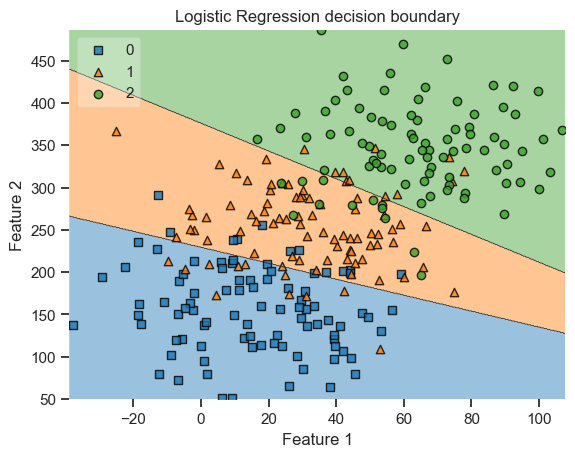

In [908]:
from mlxtend.plotting import plot_decision_regions

# Fit the Logistic Regression model using only the first and third features of the training data
multi_lr.fit(X_train.iloc[:, [0, 2]], y_train)
# Plot the decision boundary
plot_decision_regions(
    X_train.to_numpy()[:, [0, 2]], y_train.to_numpy(), clf=multi_lr, legend=2
)

# Show the plot
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logistic Regression decision boundary")
plt.show()

#### Comment on the decision boundary, do you think this is a good model or not? and based on what?


According to the decision boundary visualization, the model does an acceptable job of differentiating between various classes. It is important to acknowledge that the borders exhibit linearity, suggesting that the model assumes a linear correlation between features. The model fits the data well, however, if features in data has more complicated relationships model may show worse performance on larger dataset.
